In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pickle
import numpy as np



#f = open('driftExplorerNoBombDurGrid.pickle', 'rb')
f = open('ReportBigTests.pickle', 'rb')
data = pickle.load(f)
f.close()

In [2]:
print(data['var'])
print()
for i in range(len(data['order'])):
    print(str(i) + ' ' + data['order'][i])
print()
#for key in data['data'][list(data['data'].keys())[0]].keys():
#    print(key)

{'reclusterPeriod': [100, 200, 300], 'localRecluster': [0, 1, 2, 3], 'aloneClusterSearch': ['false', 'true'], 'adaptiveClusterSearch': ['false', 'true'], 'clusterMinThresh': [0, 1, 2, 3], 'GRIncrement': [1, 1.15, 1.4, 1.5], 'CHTimeThresh': [300, 600], 'clusteringOn': ['false', 'true'], 'clusterSearchThresh': [0, 4], 'GRDecrement': [0.75, 0.9, 1], 'CHBatteryDropThresh': [0.3, 0.4], 'largeImprovement': [0.6, 0.75], 'globalRecluster': [0, 1, 2, 3, 4], 'aloneThreshold': [0.03, 0.05, 0.07, 0.1], 'totalNodes': [500, 1000, 2000, 3500]}

0 largeImprovement
1 globalRecluster
2 clusterSearchThresh
3 clusterMinThresh
4 adaptiveClusterSearch
5 GRDecrement
6 CHTimeThresh
7 totalNodes
8 clusteringOn
9 aloneThreshold
10 aloneClusterSearch
11 localRecluster
12 GRIncrement
13 CHBatteryDropThresh
14 reclusterPeriod



In [3]:
inputDict = {'globalRecluster':'GR', 'reclusterThreshold': 'GR Thresh', 'clusteringOn':'Cluster', 'localRecluster':'LR',
             'clusterSearchThresh':'Cluster search thresh', 'CHBatteryDropThresh':'Battery Thresh', 'CHTimeThresh':'Time Thresh',
             'adaptiveClusterSearch':'Adaptive cluster search'}

In [4]:
i = 0
print(len(data['data'].keys()))

1476


In [5]:
def compareOverTime(compare, keyInds, ignoreDicts=[]):
    stats = {}
    counts = {}
    minArrLen = 10000000
    ignore = False
    for key in data['data'].keys():
        for iDict in ignoreDicts:
            count = 0
            for ind in iDict:
                for ignoreKey in iDict[ind]:
                    if key[ind] == ignoreKey:
                        count += 1
            if count == len(iDict):
                ignore = True
        if not ignore:
            run = data['data'][key]
            keyStrs = []
            for ind in keyInds:
                keyStrs += [str(key[ind])]
            statsKey = '-'.join(keyStrs)
            arr = run[compare]
            minArrLen = min(minArrLen, len(arr))
            #print(minArrLen)
            if statsKey in stats.keys():
                for i in range(minArrLen):
                    stats[statsKey][i] += arr[i]
                counts[statsKey] += 1
            else:
                stats[statsKey] = []
                for i in range(minArrLen):
                    stats[statsKey] += [arr[i]]
                counts[statsKey] = 1
        else:
            ignore = False
    for key in stats.keys():
        for i in range(minArrLen):
            stats[key][i] = stats[key][i]/counts[key]
    stats['compare'] = compare
    stats['minArrLen'] = minArrLen
    stats['keyInds'] = keyInds
    stats['ignore'] = ignoreDicts
    return stats

In [6]:
def generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel, strArr, titleArr, topY):
    legendTitle = ''
    if currentLevel < len(keyInds):
        currentKey = data['order'][keyInds[currentLevel]]
        for var in data['var'][currentKey]:
            if not (currentKey in stats['ignore'] and stats['ignore'][currentKey] == var):
                legendTitle = generateOverTimeGraphsHelper(keyInds, stats, x, separationLevel, currentLevel + 1, strArr + [str(var)], titleArr + [str(currentKey)], topY)
    else:
        key = '-'.join(strArr)
        if key in stats.keys():
            y = stats[key]
            label = ''
            for i in range(separationLevel, currentLevel):
                if titleArr[i] in inputDict:
                    label += inputDict[titleArr[i]] + ': ' + strArr[i] + '  '
                else:
                    label += titleArr[i] + ': ' + strArr[i] + '  '
            #label = '-'.join(strArr[separationLevel:])
            plt.plot(x, y, label=label)
            #legendTitle = '-'.join(titleArr[separationLevel:])
    if currentLevel == separationLevel:
        title = ''
        for i in range(0, separationLevel):
            if titleArr[i] in inputDict:
                title += inputDict[titleArr[i]] + ': ' + strArr[i] + '  '
            else:
                title += titleArr[i] + ': ' + strArr[i] + '  '
        plt.xlabel('Time (s)')
        plt.ylabel(stats['compare'])
        #plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.55), title=legendTitle)
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title=legendTitle)
        #plt.legend(title=legendTitle)
        bottom, top = plt.ylim()
        if topY != 0:
            plt.ylim(bottom, topY)
        plt.title(title)
        plt.show()
    return legendTitle

def generateOverTimeGraphs(stats, separationLevel=0, topY=0):
    generateOverTimeGraphsHelper(stats['keyInds'], stats, [i for i in range(stats['minArrLen'])], separationLevel, 0, [], [], topY)

In [7]:
def generateAllGraphs(keyInds, ignoreDict={}, separationLevel=0, topY=0):
    for key in data['data'][list(data['data'].keys())[0]].keys():
        if type(data['data'][list(data['data'].keys())[0]][key]) is list:
            dat = compareOverTime(key, keyInds, ignoreDict)
            generateOverTimeGraphs(dat, separationLevel, topY)

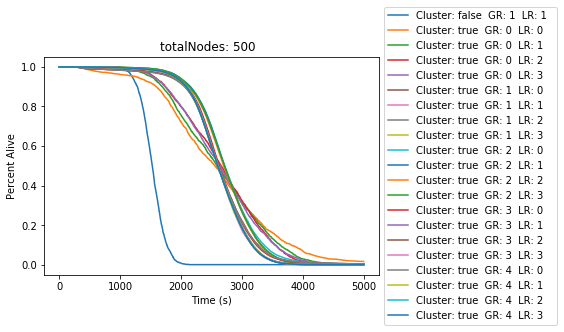

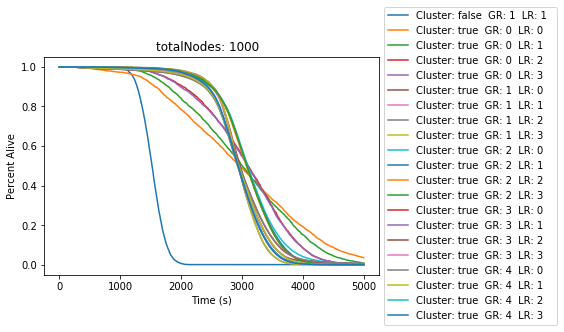

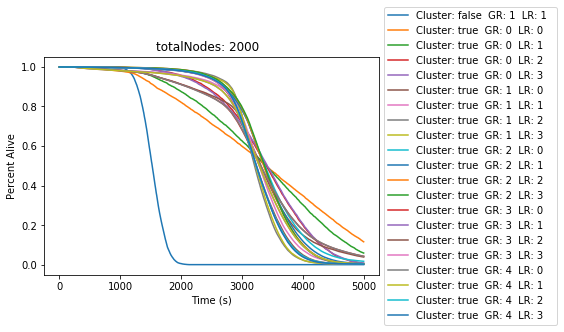

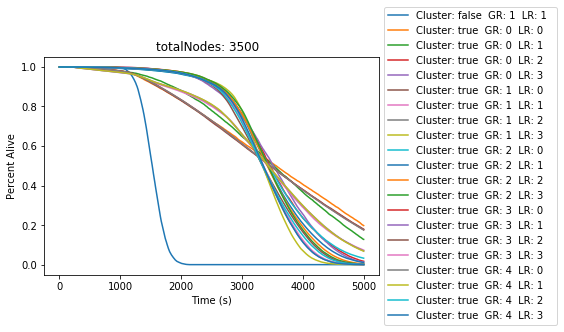

In [33]:
Alive = compareOverTime('Percent Alive', [7,8,1,11], [{10:['true'], 3:[0,2,3]}, {1:[0,2], 10:['false']}])
generateOverTimeGraphs(Alive, 1)

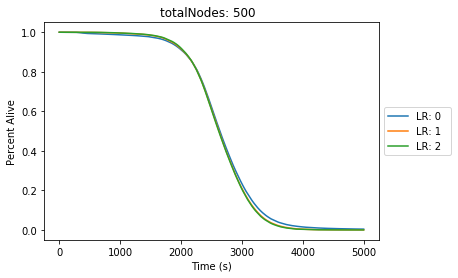

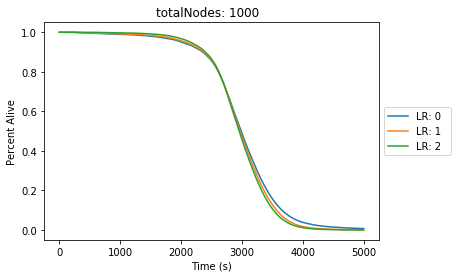

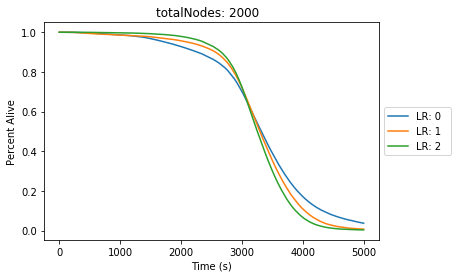

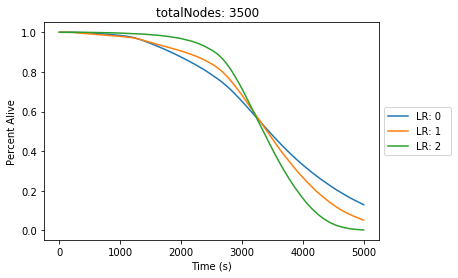

In [9]:
Alive = compareOverTime('Percent Alive', [7,11], [{8:['false']}, {11:[3]}])
generateOverTimeGraphs(Alive, 1)

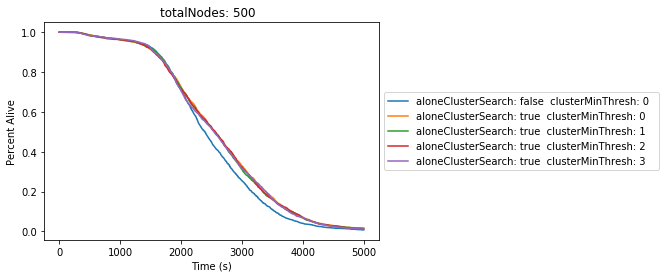

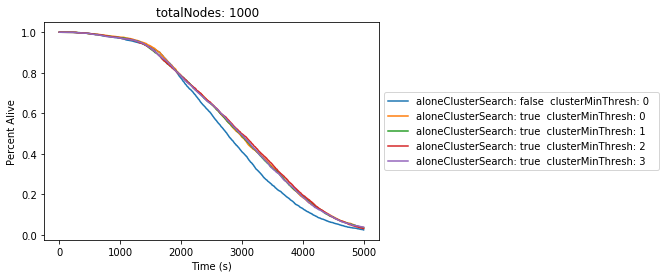

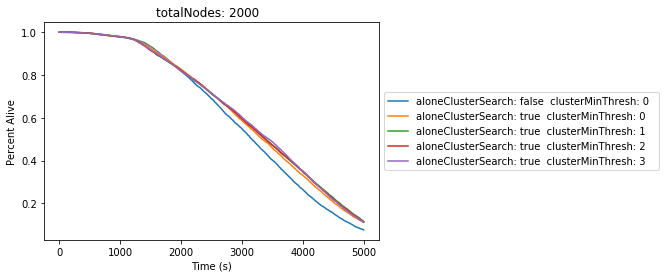

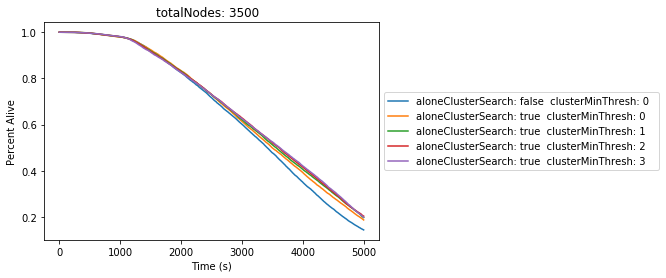

In [25]:
Alive = compareOverTime('Percent Alive', [7,10,3], [{8:['false']}, {1:[1,2,3,4]}, {11:[1,2,3]}])
generateOverTimeGraphs(Alive, 1)

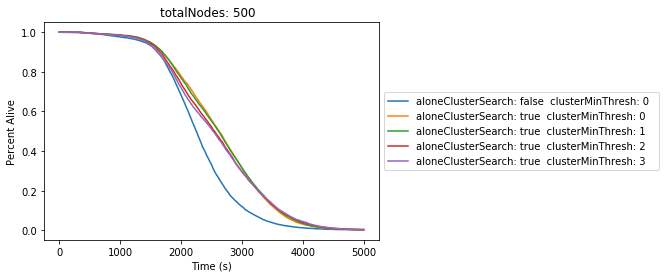

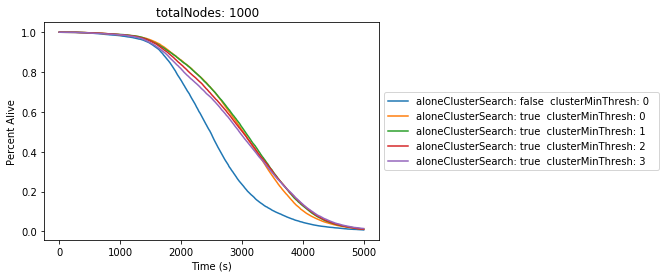

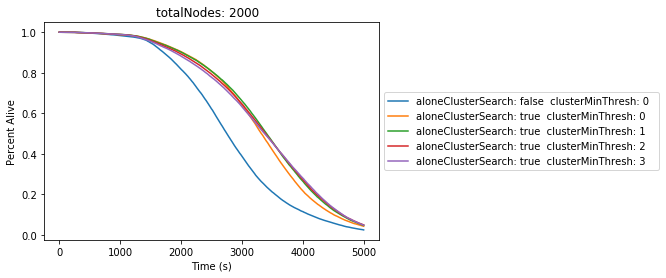

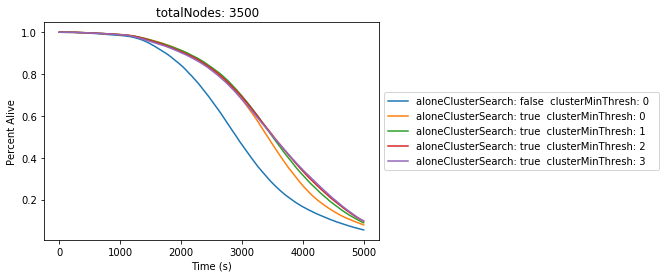

In [26]:
Alive = compareOverTime('Percent Alive', [7,10,3], [{8:['false']}, {1:[1,2,3,4]}, {11:[]}])
generateOverTimeGraphs(Alive, 1)

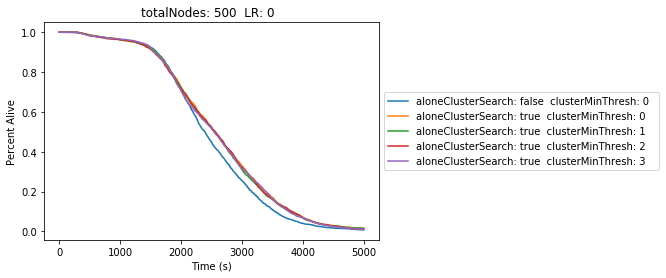

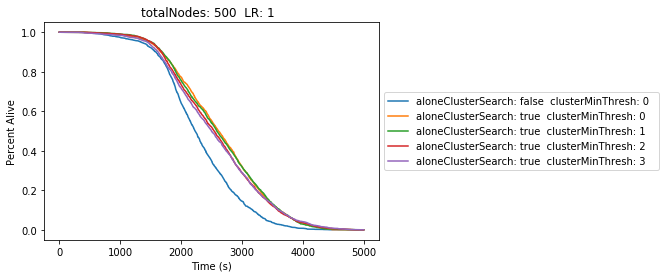

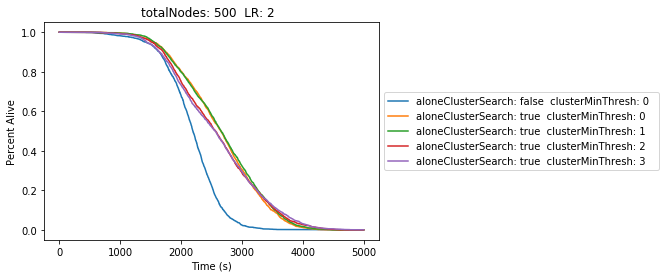

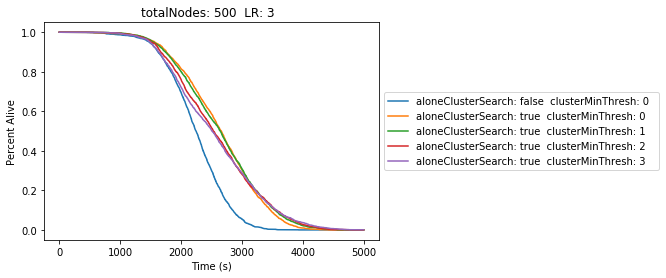

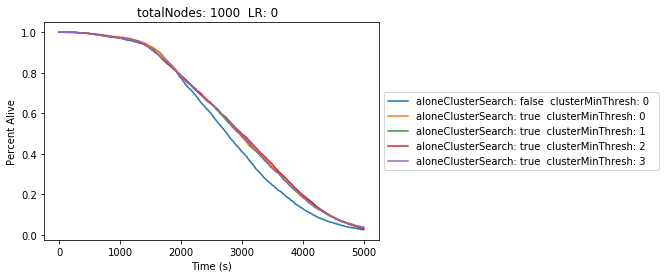

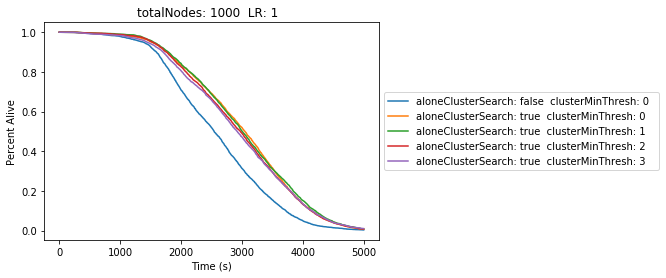

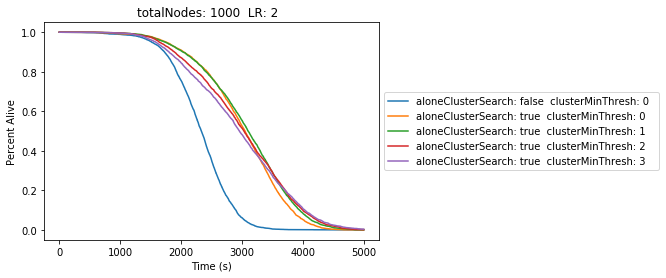

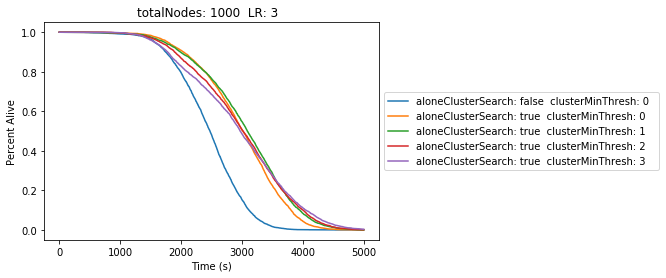

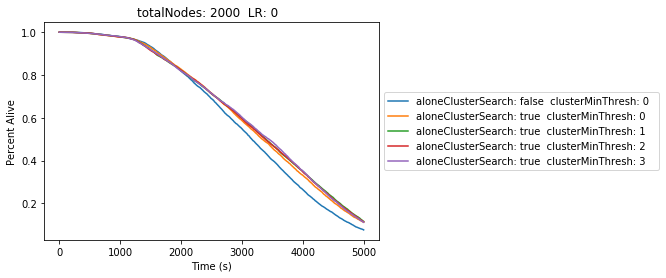

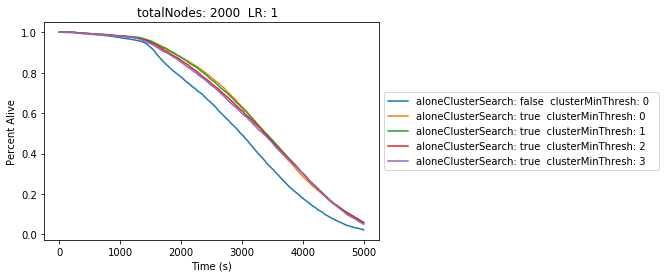

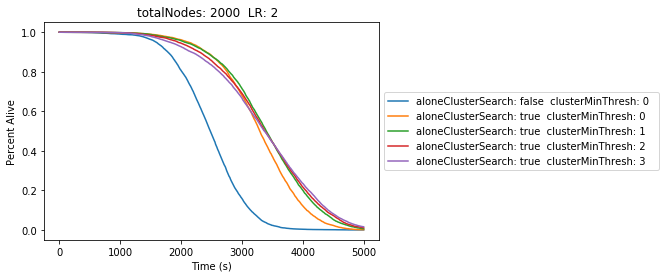

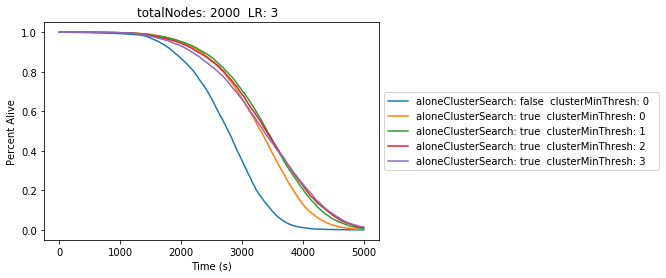

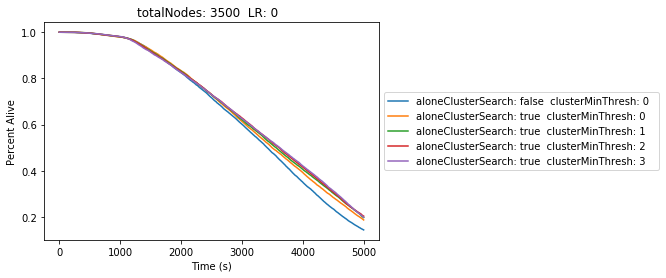

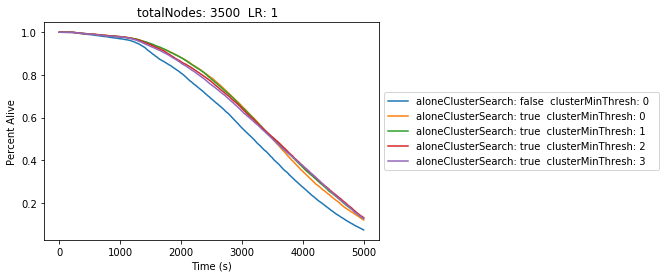

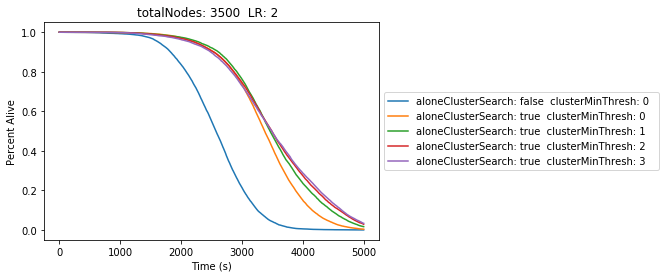

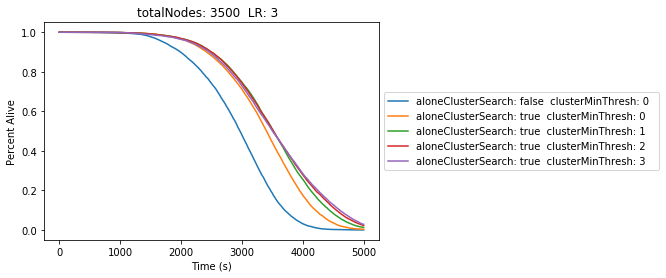

In [31]:
Alive = compareOverTime('Percent Alive', [7,11,10,3], [{8:['false']}, {1:[1,2,3,4]}, {11:[]}])
generateOverTimeGraphs(Alive, 2)

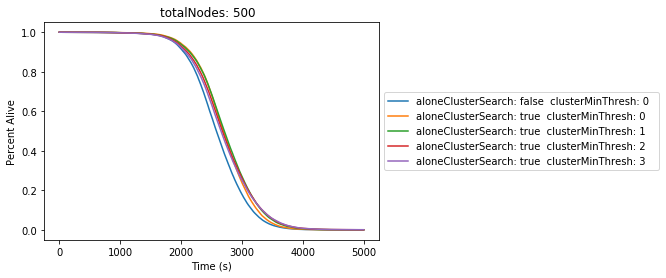

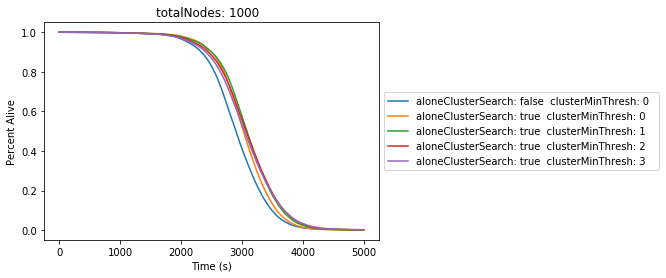

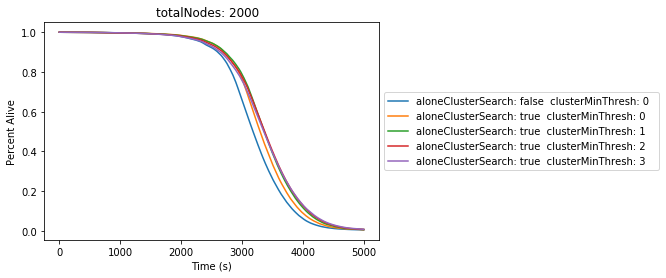

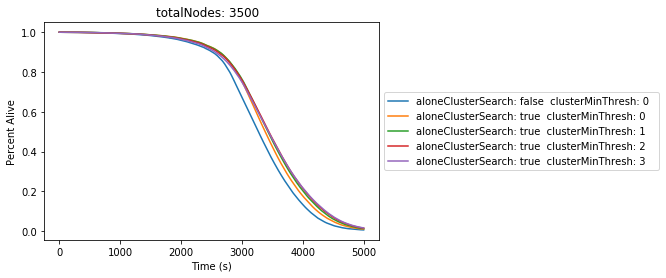

In [22]:
Alive = compareOverTime('Percent Alive', [7,10,3], [{8:['false']}, {1:[0,1,3,4]}, {11:[]}])
generateOverTimeGraphs(Alive, 1)

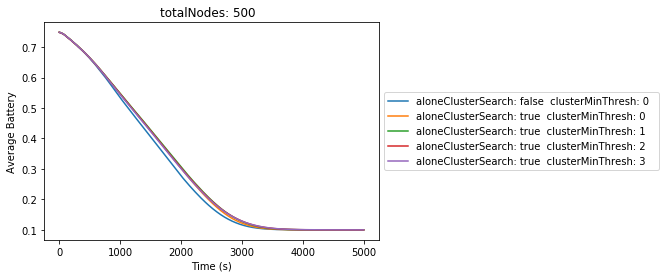

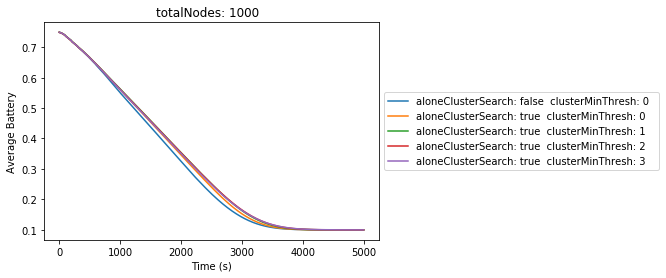

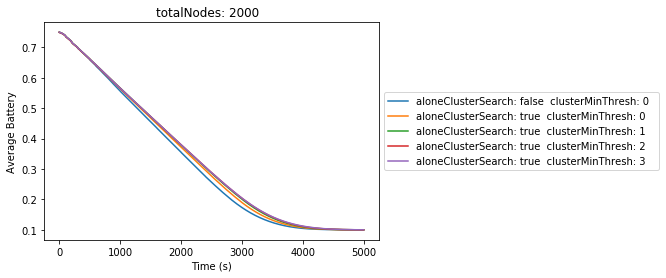

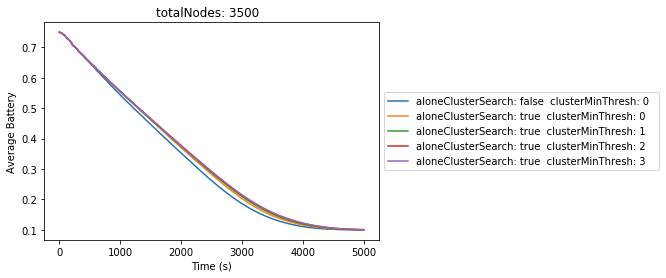

In [23]:
Alive = compareOverTime('Average Battery', [7,10,3], [{8:['false']}, {1:[0,1,3,4]}, {11:[]}])
generateOverTimeGraphs(Alive, 1)

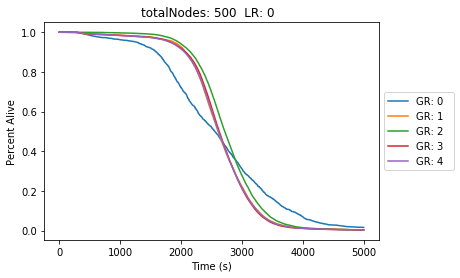

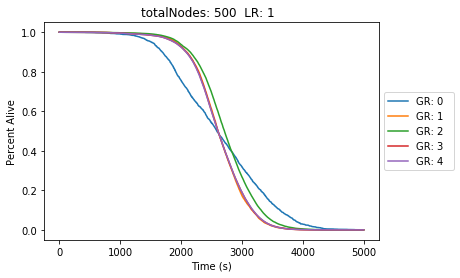

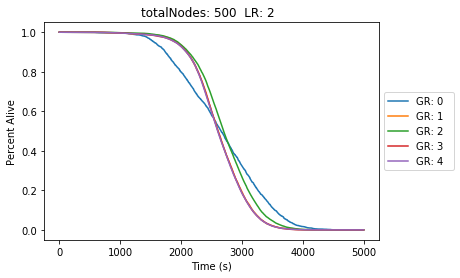

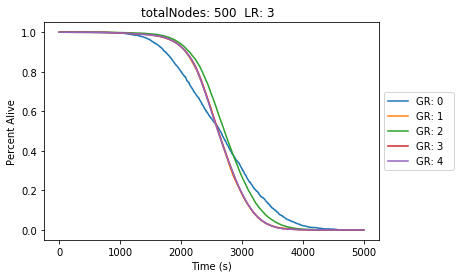

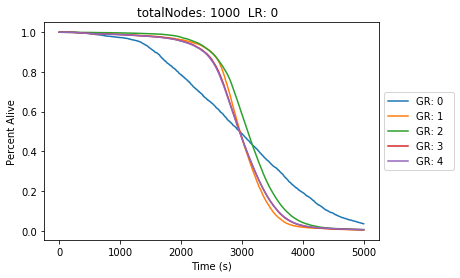

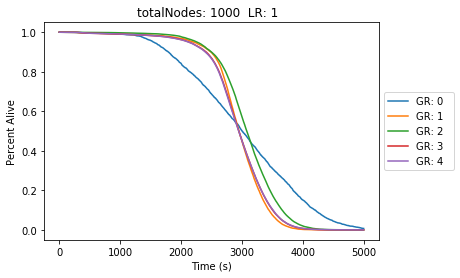

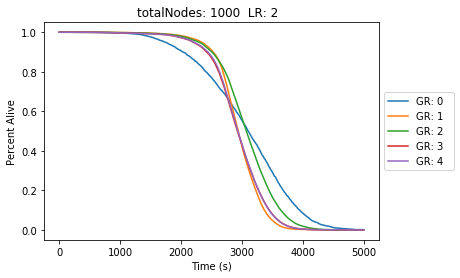

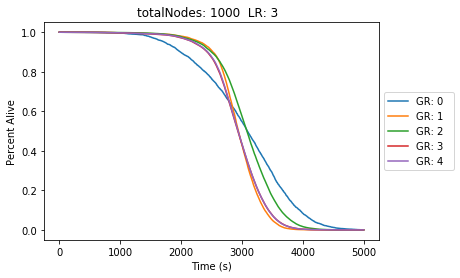

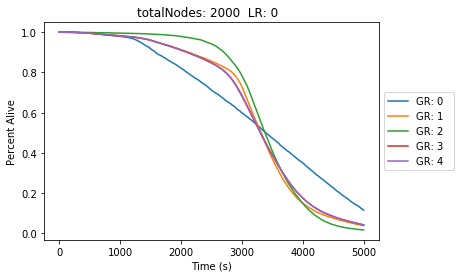

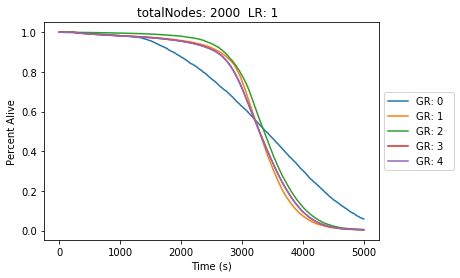

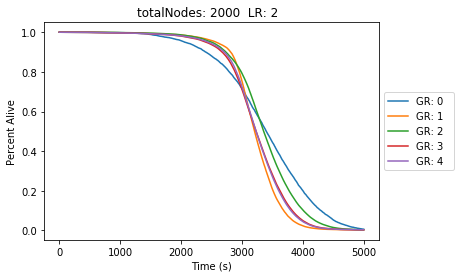

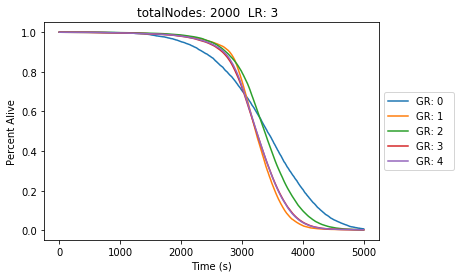

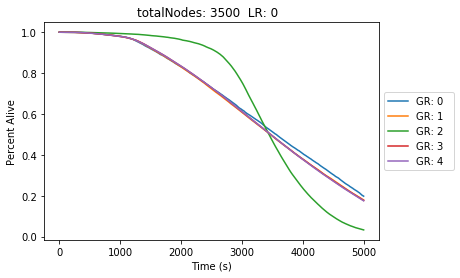

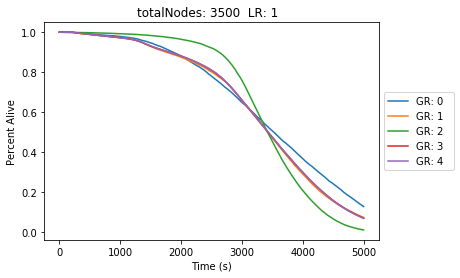

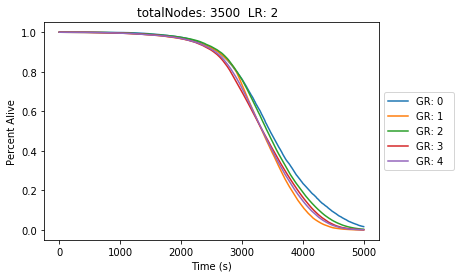

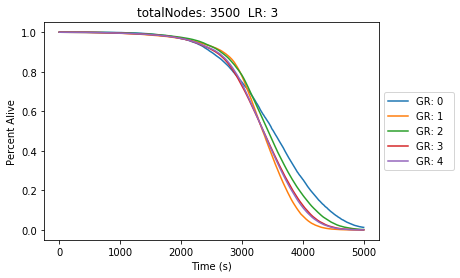

In [52]:
Alive = compareOverTime('Percent Alive', [7,11,1], [{8:['false']},{10:['true'], 3:[0,2,3]}, {1:[0,2], 10:['false']}, {5:[]}])
generateOverTimeGraphs(Alive, 2)

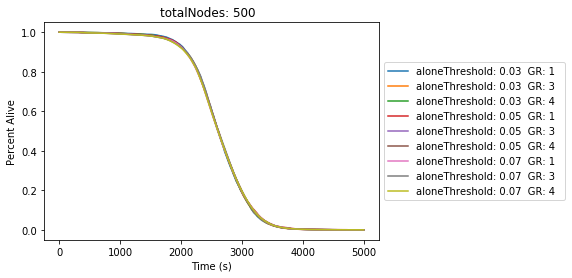

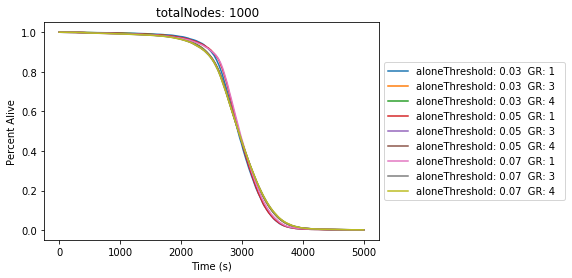

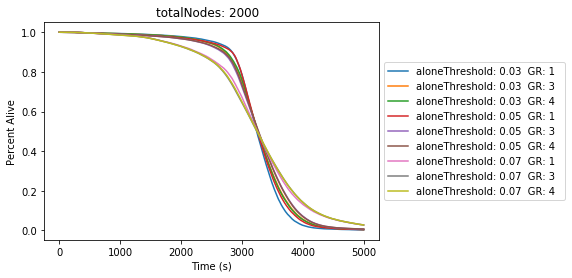

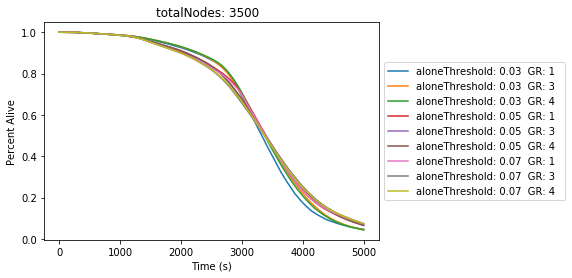

In [54]:
Alive = compareOverTime('Percent Alive', [7,9,1], [{8:['false']},{10:['true'], 3:[0,2,3]}, {1:[0,2], 10:['false']}, {1:[0,2]}])
generateOverTimeGraphs(Alive, 1)

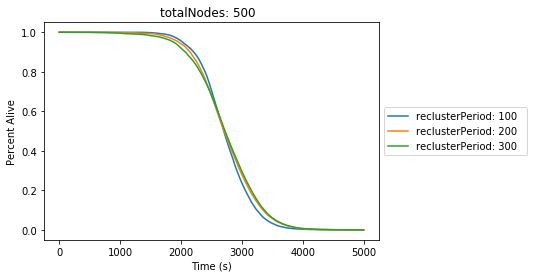

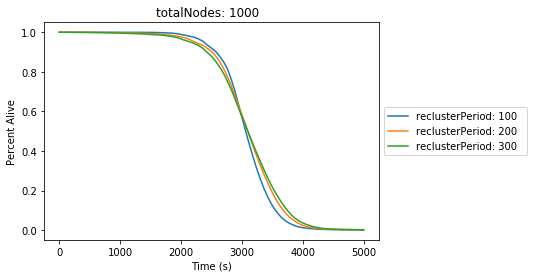

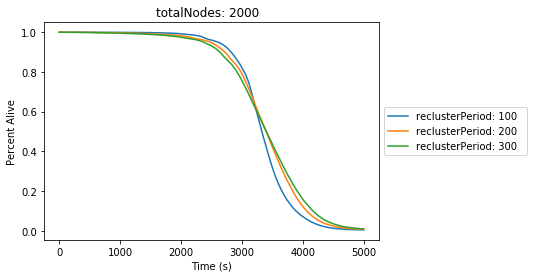

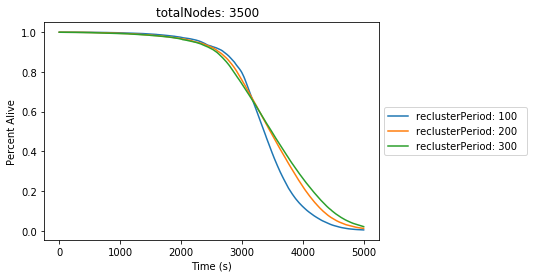

In [61]:
Alive = compareOverTime('Percent Alive', [7,14], [{8:['false']},{10:['true'], 3:[0,2,3]}, {1:[0,2], 10:['false']}, {1:[0,1,3,4]}])
generateOverTimeGraphs(Alive, 1)

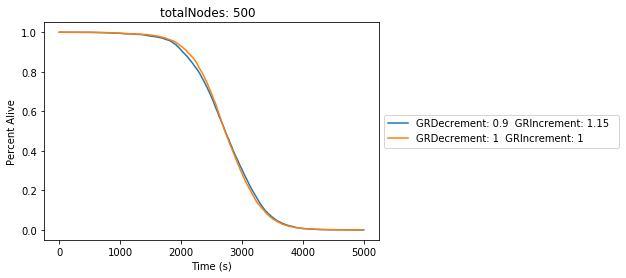

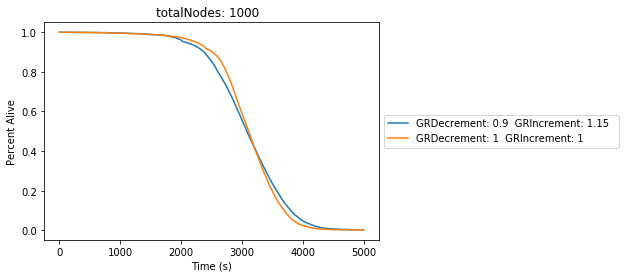

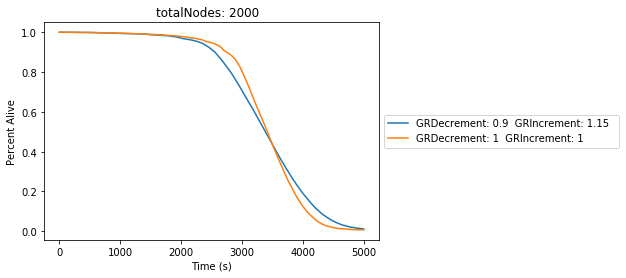

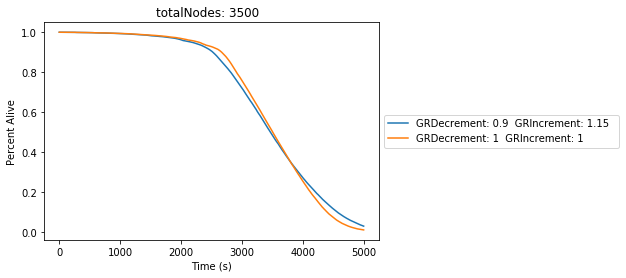

In [63]:
Alive = compareOverTime('Percent Alive', [7,5,12], [{8:['false']},{10:['true'], 3:[0,2,3]}, {1:[0,2], 10:['false']}, {1:[0,1,3,4]}, {14:[100,200]}])
generateOverTimeGraphs(Alive, 1)

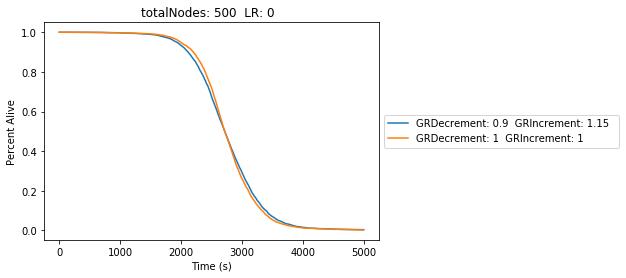

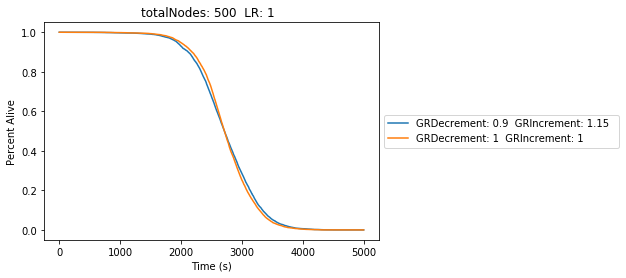

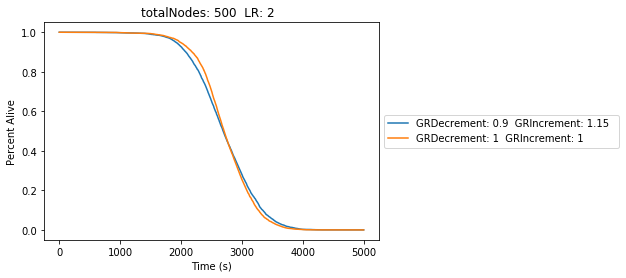

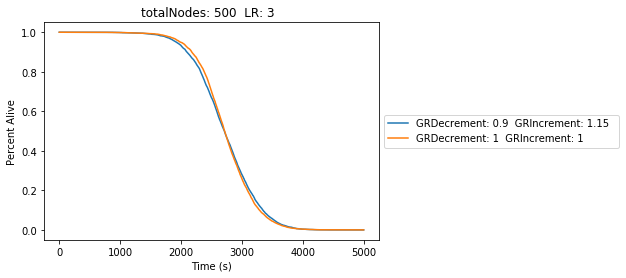

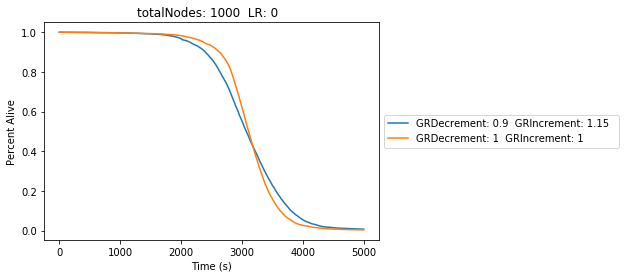

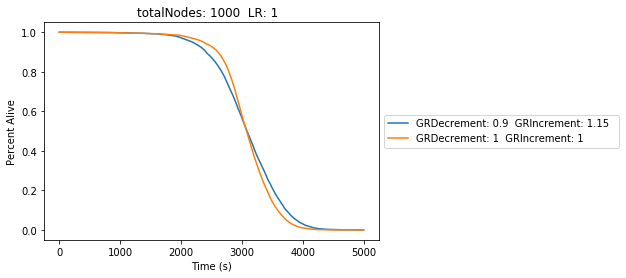

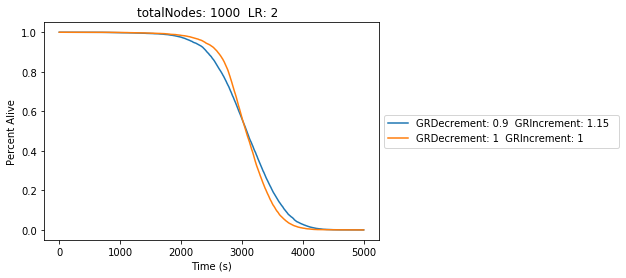

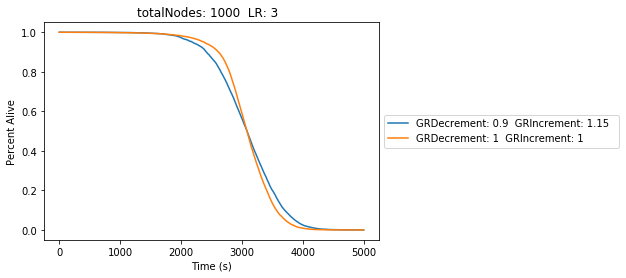

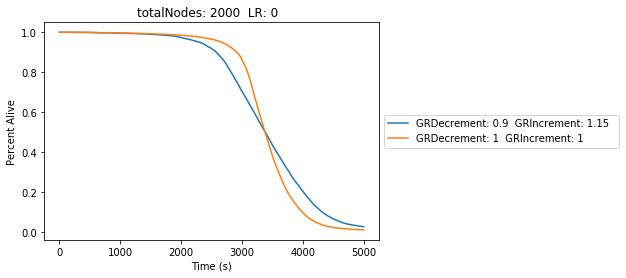

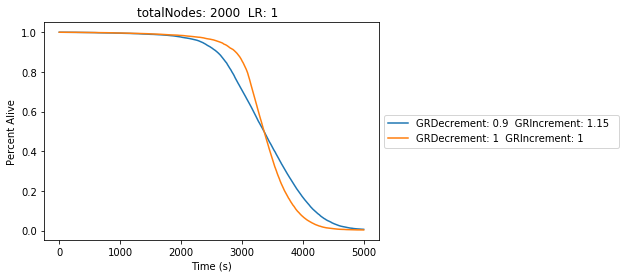

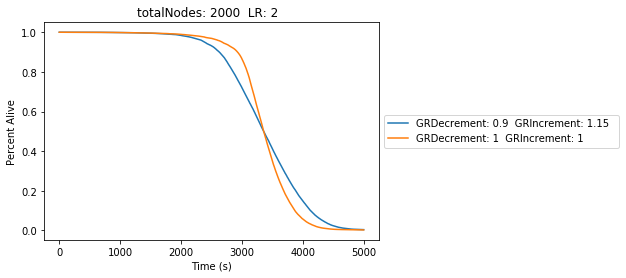

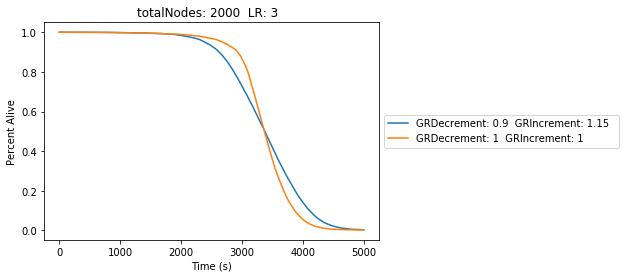

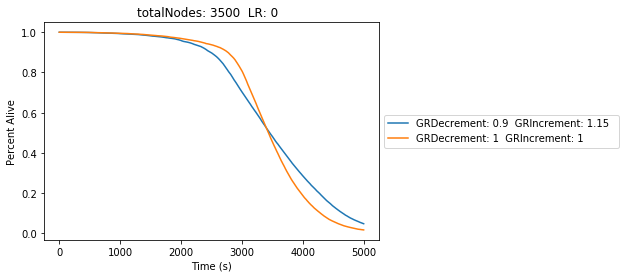

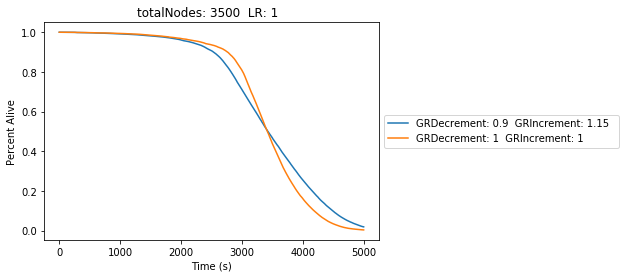

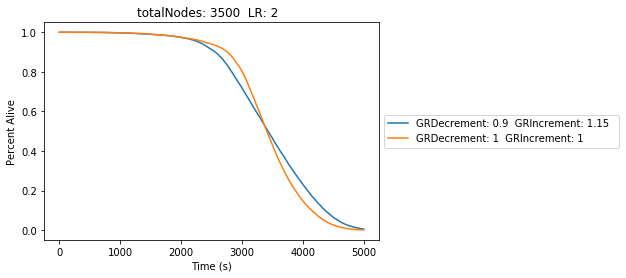

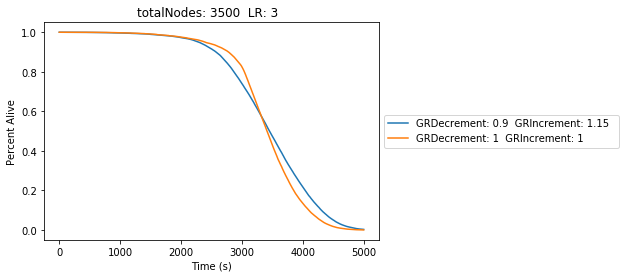

In [66]:
Alive = compareOverTime('Percent Alive', [7,11,5,12], [{8:['false']},{10:['true'], 3:[0,2,3]}, {1:[0,2], 10:['false']}, {1:[0,1,3,4]}, {14:[]}])
generateOverTimeGraphs(Alive, 2)

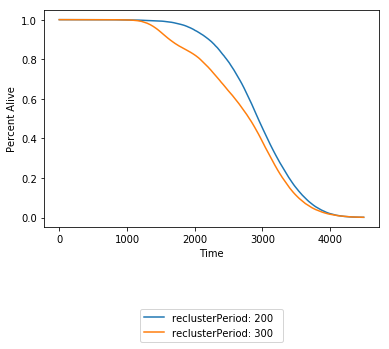

In [44]:
Alive = compareOverTime('Percent Alive', [11], [{10:['false']}, {5:[0]}])
generateOverTimeGraphs(Alive, 0)

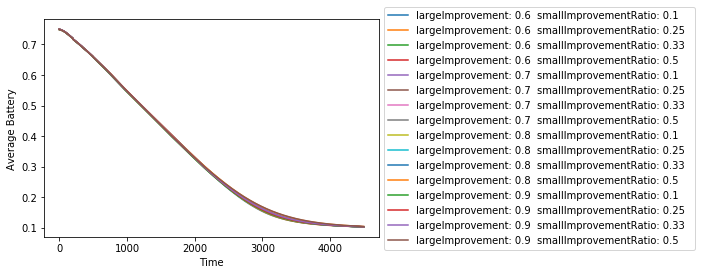

In [33]:
Alive = compareOverTime('Average Battery', [8,11], [{10:['false']}, {5:[0]}])
generateOverTimeGraphs(Alive, 0)

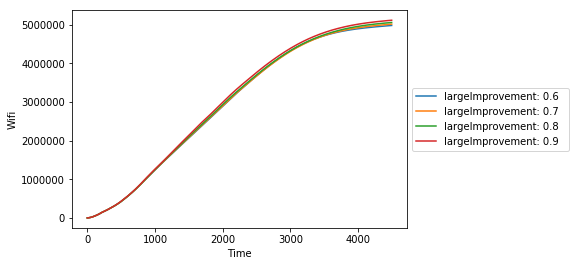

In [34]:
Alive = compareOverTime('Wifi', [8], [{10:['false']}, {5:[0]}])
generateOverTimeGraphs(Alive, 0)

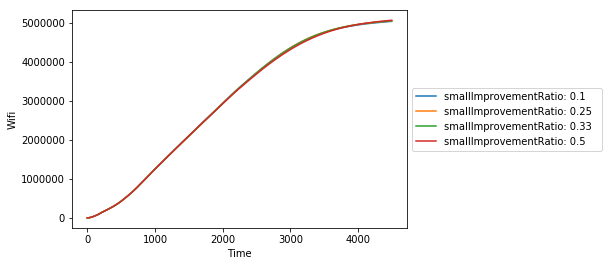

In [35]:
Alive = compareOverTime('Wifi', [11], [{10:['false']}, {5:[0]}])
generateOverTimeGraphs(Alive, 0)

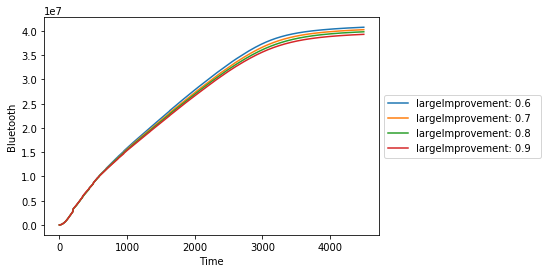

In [36]:
Alive = compareOverTime('Bluetooth', [8], [{10:['false']}, {5:[0]}])
generateOverTimeGraphs(Alive, 0)

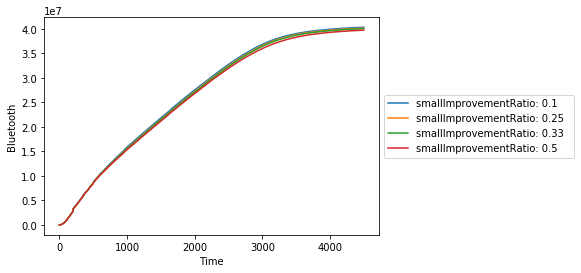

In [37]:
Alive = compareOverTime('Bluetooth', [11], [{10:['false']}, {5:[0]}])
generateOverTimeGraphs(Alive, 0)